<a href="https://colab.research.google.com/github/MertYuksek/Stride-Padding-In-Convolution/blob/main/stridePaddingConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Create a convolution instance

In [61]:
# create a conv2d class instance

# parameters
inChans = 3 # rgb
outChans = 15 # fifteen feature maps = fifteen kernels = fifteen bias
krnSize = 5 # kernel size 5x5
stride = 2
padding = 2
# result img shape = [1, 15, 32, 32] = 1 img, 15 results, 32x32 img size

# create instance
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of kernel: ' + str(c.weight[14].shape) )
print( 'Size of bias: ' + str(c.bias.shape) ) # Each kernel has own bias.

#print(c.weight)

Conv2d(3, 15, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of kernel: torch.Size([3, 5, 5])
Size of bias: torch.Size([15])


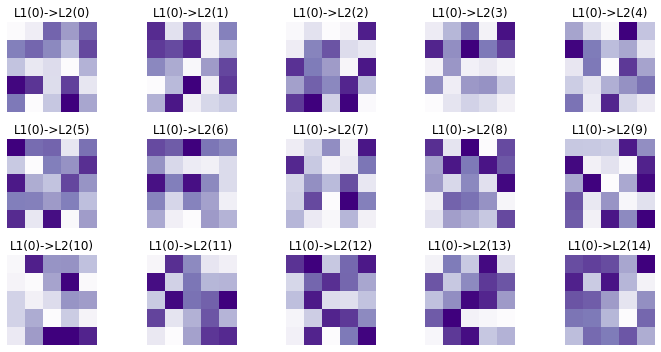

In [62]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


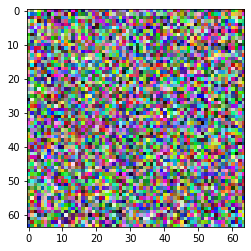

In [63]:
# size of the image (N, RGB, width, height)
imsize = (1,3,64,64)
img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize 2,3,1,0 these are indexes
img2view = img.permute(2,3,1,0).numpy()

print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [64]:
#  convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape) # 1 img, 15 convolution results, 60 x 60 size img because of there is no padding.

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 32, 32])


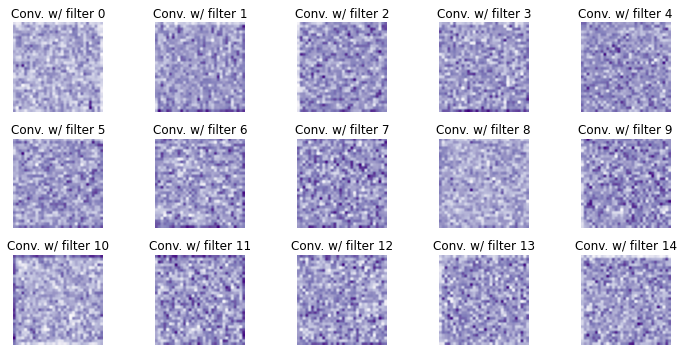

In [65]:
# What do these results look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  I = torch.squeeze(convRes[0,i,:,:]).detach()
   # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()